# Study Resonance Driving Terms (RDTs)

### Imports

In [1]:
from cpymad.madx import Madx
from pyoptics import optics
import matplotlib.pyplot as plt
import numpy as np
import inspect


# Standard imports
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns


# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'

### Study Run III optics

In [2]:
def load_optics(path_optics, path_hl = None, path_settings = None):

    # Get run
    run = path_optics.split('/')[1]

    # Build sequence
    mad = Madx()

    # Prepare for building sequence
    mad.input("""
    option,-echo,-info;
    system,"mkdir temp";
    """)

    # Build sequence
    mad.input(f"""
    call,file="modules/{run}/lhc.seq";
    """)

    # Apply HL optics if requested
    if path_hl is not None:
        mad.input(f"""
        call,file="{path_hl}";
        """)

    # Apply macro
    mad.input(f"""
    call,file="modules/{run}/toolkit/macro.madx";
    """)

    # Define beam differently depending if it's HL or not
    if path_hl is None:
        mad.input(f"""
            nrj=450;
            beam,particle=proton,sequence=lhcb1,energy=nrj;
            beam,particle=proton,sequence=lhcb2,energy=nrj;
        """)
    else:
        mad.input(f"""exec,mk_beam(450);""")

    # Injection optics
    mad.input(f"""
    call,file="{path_optics}";
    """)

    # Phase knob
    if path_settings is not None:
        mad.input(f"""
        call,file="{path_settings}";
        """)
    
    return mad


In [3]:
# Add twiss_opt and check_ip functions

def macros(mad):
  mad.input("""
  twiss_opt: macro = {
  set,format=".15g";
  select,flag=twiss,clear;
  select,flag=twiss,
        column=name,s,l,
                lrad,angle,k1l,k2l,k3l,k1sl,k2sl,k3sl,hkick,vkick,kick,tilt,
                betx,bety,alfx,alfy,dx,dpx,dy,dpy,mux,muy,x,y,px,py,t,pt,
                wx,wy,phix,phiy,n1,ddx,ddy,ddpx,ddpy,
                keyword,aper_1,aper_2,aper_3,aper_4,
                apoff_1,apoff_2,
                aptol_1,aptol_2,aptol_3,apertype,mech_sep;
  select,flag=aperture,
        column=name,s,n1,aper_1,aper_2,aper_3,aper_4,rtol,xtol,ytol,
                apoff_1,apoff_2,
                betx,bety,dx,dy,x,y,apertype;
  };
  """)


  mad.input("""
  CHECK_IP(BIM): macro = {
  exec,twiss_opt;
  use,sequence=lhcBIM;
  if (mylhcbeam<3) {
    twiss,file=twiss_lhcBIM.tfs;
  } else {
    twiss,file=twiss_lhcb4.tfs;
  };
  refbetxIP1BIM=table(twiss,IP1,betx); refbetyIP1BIM=table(twiss,IP1,bety);
  refbetxIP5BIM=table(twiss,IP5,betx); refbetyIP5BIM=table(twiss,IP5,bety);
  refbetxIP2BIM=table(twiss,IP2,betx); refbetyIP2BIM=table(twiss,IP2,bety);
  refbetxIP8BIM=table(twiss,IP8,betx); refbetyIP8BIM=table(twiss,IP8,bety);
  refqxBIM=table(summ,q1); refqyBIM=table(summ,q2);
  refdqxBIM=table(summ,dq1); refdqyBIM=table(summ,dq2);
  refxIP1BIM=table(twiss,IP1,x); refyIP1BIM=table(twiss,IP1,y);
  refxIP5BIM=table(twiss,IP5,x); refyIP5BIM=table(twiss,IP5,y);
  refxIP2BIM=table(twiss,IP2,x); refyIP2BIM=table(twiss,IP2,y);
  refxIP8BIM=table(twiss,IP8,x); refyIP8BIM=table(twiss,IP8,y);
  refpxIP1BIM=table(twiss,IP1,px); refpyIP1BIM=table(twiss,IP1,py);
  refpxIP5BIM=table(twiss,IP5,px); refpyIP5BIM=table(twiss,IP5,py);
  refpxIP2BIM=table(twiss,IP2,px); refpyIP2BIM=table(twiss,IP2,py);
  refpxIP8BIM=table(twiss,IP8,px); refpyIP8BIM=table(twiss,IP8,py);
  refxIP3BIM=table(twiss,IP3,x); refyIP3BIM=table(twiss,IP3,y);
  refxIP4BIM=table(twiss,IP4,x); refyIP4BIM=table(twiss,IP4,y);
  refxIP6BIM=table(twiss,IP6,x); refyIP6BIM=table(twiss,IP6,y);
  refxIP7BIM=table(twiss,IP7,x); refyIP7BIM=table(twiss,IP7,y);
  refpxIP3BIM=table(twiss,IP3,px); refpyIP3BIM=table(twiss,IP3,py);
  refpxIP4BIM=table(twiss,IP4,px); refpyIP4BIM=table(twiss,IP4,py);
  refpxIP6BIM=table(twiss,IP6,px); refpyIP6BIM=table(twiss,IP6,py);
  refpxIP7BIM=table(twiss,IP7,px); refpyIP7BIM=table(twiss,IP7,py);
  value,refbetxIP1BIM,refbetyIP1BIM;
  value,refbetxIP5BIM,refbetyIP5BIM;
  value,refbetxIP2BIM,refbetyIP2BIM;
  value,refbetxIP8BIM,refbetyIP8BIM;
  value,refqxBIM,refqyBIM;
  value,refdqxBIM,refdqyBIM;
  value,refxIP1BIM,refyIP1BIM;
  value,refxIP5BIM,refyIP5BIM;
  value,refxIP2BIM,refyIP2BIM;
  value,refxIP8BIM,refyIP8BIM;
  value,refpxIP1BIM,refpyIP1BIM;
  value,refpxIP5BIM,refpyIP5BIM;
  value,refpxIP2BIM,refpyIP2BIM;
  value,refpxIP8BIM,refpyIP8BIM;
  };
  """)
  
  return mad

In [4]:
# Check that everything is ok at IPs and output twiss files
def check_and_load_twiss(mad):
    
    mad.input("""
    exec,check_ip(b1);
    exec,check_ip(b2);
    """
    )

    # Load Twiss
    tb1=optics.open('twiss_lhcb1.tfs')
    tb2=optics.open('twiss_lhcb2.tfs')
    
    # Impose strength for octupoles
    tb1.k3l[tb1//'mo.*']=0.1
    tb2.k3l[tb2//'mo.*']=0.1
    
    return mad, tb1, tb2

In [5]:
# Function to compute driving terms properly
def driving_term_oct(t, m=0, n=0, p=0, q=0):
    l_dv = []
    for s_idx in range(len(t.s)):
        h = -np.real(t.betx ** (abs(m) / 2.0  + abs(p)/2.0) * t.bety ** (abs(n) / 2.0 + abs(q)/2.0) * t.k3l)
        dv = h * np.exp(1j * ((m - p) * (t.mux - t.mux[s_idx]) + (n - q) * (t.muy- t.muy[s_idx])))
        dv = dv / (1 - np.exp(2j * np.pi * ( (m-p) * t.mux[-1] +  (n-q) * t.muy[-1])))
        l_dv.append(abs(np.sum(dv)))
    return l_dv

# Function to compute RDTs
def compute_RDT(t, RDT = (0,4)):
    return abs(np.cumsum(t.drvterm(*RDT)*t.k3l))

# Get all RDTs
def get_all_RDTs(t):
    #return t.s, {RDT : driving_term_oct(t, *RDT) for RDT in [(4,0), (4,0), (1,3), (3,1), (2,2)]}
    return t.s, {RDT : compute_RDT(t, RDT) for RDT in [(0,4), (4,0), (1,3), (3,1), (2,2)]}

# Plot RDTs
def plot_RDT(s, dic_RDTs, title = None, title_save = "RDT.pdf"):
    for type_RDT, RDT in dic_RDTs.items():
        plt.plot(s,RDT, label = str(type_RDT))
    plt.xlabel('s [m]')
    plt.ylabel('RDTs (a.u.)')
    plt.legend()
    plt.grid()
    if title is not None:
        plt.title(title)
    plt.savefig(title_save, bbox_inches='tight')
    plt.show()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2024.01.08 11:11:35      +
  ++++++++++++++++++++++++++++++++++++++++++++


mkdir: cannot create directory ‘temp’: File exists


++++++ warning: implicit element re-definition ignored: ip1
++++++ warning: implicit element re-definition ignored: mbas2.1r1
++++++ warning: implicit element re-definition ignored: tas.1r1
++++++ warning: implicit element re-definition ignored: mqxa.1r1
++++++ warning: implicit element re-definition ignored: mcbxh.1r1
++++++ warning: implicit element re-definition ignored: mcbxv.1r1
++++++ warning: implicit element re-definition ignored: mqxb.a2r1
++++++ warning: implicit element re-definition ignored: mcbxh.2r1
++++++ warning: implicit element re-definition ignored: mcbxv.2r1
++++++ warning: implicit element re-definition ignored: mqxb.b2r1
++++++ warning: implicit element re-definition ignored: tasb.3r1
++++++ warning: implicit element re-definition ignored: mqsx.3r1
++++++ warning: implicit element re-definition ignored: mqxa.3r1
++++++ warning: implicit element re-definition ignored: mcbxh.3r1
++++++ warning: implicit element re-definition ignored: mcbxv.3r1
++++++ warning: implic

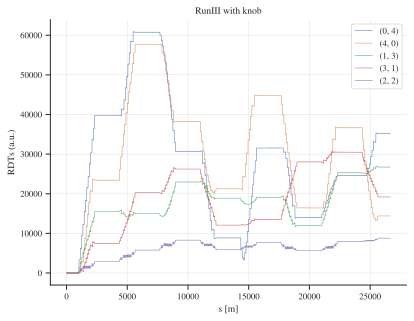

enter Twiss module
  
iteration:   1 error:   2.776299E-03 deltap:   0.000000E+00
orbit:  -1.987647E-03 -7.924653E-06  3.352869E-05 -1.705009E-04  0.000000E+00  0.000000E+00
  
iteration:   2 error:   9.793918E-05 deltap:   0.000000E+00
orbit:  -2.000047E-03 -4.989014E-09 -4.553741E-09 -1.699952E-04  0.000000E+00  0.000000E+00
  
iteration:   3 error:   5.389333E-08 deltap:   0.000000E+00
orbit:  -1.999999E-03  2.569142E-11 -3.400264E-12 -1.700000E-04  0.000000E+00  0.000000E+00

++++++ table: summ

length orbit5 alfa gammatr 
26658.8831999989 -0 0.000347985143980626 53.606770982878 

q1 dq1 betxmax dxmax 
62.309999903699 9.97379554506739 588.948167523327 2.76906293177313 

dxrms xcomax xcorms q2 
1.49670253200205 0.00849150235090286 0.000787609686360079 60.3200000322511 

dq2 betymax dymax dyrms 
9.99265639792865 640.919871876276 0.149395212768029 0.0380208748683305 

ycomax ycorms deltap synch_1 
0.0084999238573682 0.000773573236571676 0 0 

synch_2 synch_3 synch_4 synch_5 
0 0 0 0 


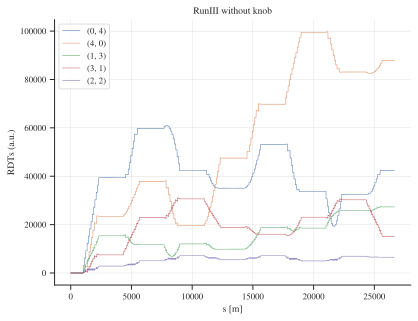

In [6]:
# Load paths
path_optics_with_knob= "modules/runIII2023/operation/optics/R2023a_A11mC11mA10mL10m_PhaseKnob100ON.madx"
path_settings = "modules/runIII2023/scenarios/pp_lumi/RAMP-SQUEEZE-6.8TeV-ATS-2m-2023_V1/0/settings.madx"

# Plot RDTs with and without phase knob
mad = load_optics(path_optics_with_knob, path_hl = None, path_settings = path_settings)
mad = macros(mad)
mad, tb1, tb2 = check_and_load_twiss(mad)
s_with_knob, dic_RDTs_with_knob = get_all_RDTs(tb1)
plot_RDT(s_with_knob, dic_RDTs_with_knob, title = 'RunIII with knob', title_save = "RDT_with_knob.pdf")

# Remove phase knob
mad.input("phase_change.b1=0.0;")
mad.input("phase_change.b2=0.0;")

# Replot
mad, tb1, tb2 = check_and_load_twiss(mad)
s_without_knob, dic_RDTs_without_knob = get_all_RDTs(tb1)

plot_RDT(s_without_knob, dic_RDTs_without_knob, title = 'RunIII without knob', title_save = "RDT_without_knob.pdf")



In [7]:
# Print the source code of the function to get rdts
print(inspect.getsource(tb1.drvterm))

    def drvterm(t, m=0, n=0, p=0, q=0):
        dv = t.betx ** (abs(m) / 2.0) * t.bety ** (abs(n) / 2.0)
        dv = dv * np.exp(+2j * np.pi * ((m - 2 * p) * t.mux + (n - 2 * q) * t.muy))
        return dv



In [8]:
mad.input("""
printf, text = '%f', value = ARC_SQUEEZE ;")
""")

0.000000


True

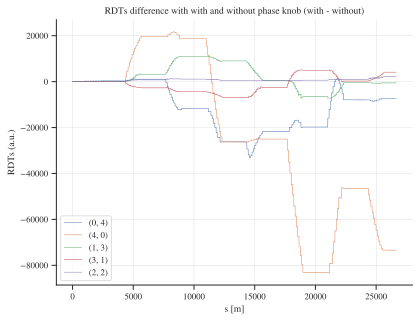

In [9]:
# Plot difference between RDTs
dic_diff_RDT = {type_RDT : dic_RDTs_with_knob[type_RDT] - dic_RDTs_without_knob[type_RDT] for type_RDT in dic_RDTs_with_knob}
plot_RDT(s_without_knob, dic_diff_RDT, title = 'RDTs difference with with and without phase knob (with - without)', title_save = "diff_RDTs.pdf")


In [10]:
def return_mu_values(t):
    # Get relevant markers
    cond =[True if x.startswith('s.ds.l') or x.startswith('e.ds.r') else False for x in t.name ]
    l_markers = t.name[cond]
    l_s_markers = t.s[cond]
    l_mux_markers = t.mux[cond]
    l_muy_markers = t.muy[cond]

    # Add last element at the beginning to close the ring
    l_markers = np.insert(l_markers, 0, l_markers[-1])
    l_s_markers = np.insert(l_s_markers, 0, l_s_markers[-1])
    l_mux_markers = np.insert(l_mux_markers, 0, l_mux_markers[-1]-t.mux[-1])
    l_muy_markers = np.insert(l_muy_markers, 0, l_muy_markers[-1]-t.muy[-1])
    
    
    print(l_markers)
    
    # Get list of mu values in the arcs and straight sections
    l_mux_strengths = l_mux_markers[1:] - l_mux_markers[:-1]
    l_muy_strengths = l_muy_markers[1:] - l_muy_markers[:-1]
    l_mux_ss = l_mux_strengths[0::2]
    l_mux_arc = l_mux_strengths[1::2]
    l_muy_ss = l_muy_strengths[0::2]
    l_muy_arc = l_muy_strengths[1::2]
    
    return l_mux_ss, l_mux_arc, l_muy_ss, l_muy_arc


In [11]:
# Get the phasing in the arcs and straight sections
mad.input("phase_change.b1=0.0;")
mad.input("phase_change.b2=0.0;")
ll_mu_b1_runIII_without_knob = return_mu_values(tb1)
ll_mu_b2_runIII_without_knob = return_mu_values(tb2)
# Reactivate phase knob
mad.input("phase_change.b1=1.0;")
mad.input("phase_change.b2=1.0;")
mad, tb1, tb2 = check_and_load_twiss(mad)
ll_mu_b1_runIII_with_knob = return_mu_values(tb1)
ll_mu_b2_runIII_with_knob = return_mu_values(tb2)

#muxIP1
print(ll_mu_b1_runIII_with_knob[0])

# mux12b1 
print(ll_mu_b1_runIII_with_knob[1])

['s.ds.l1.b1' 'e.ds.r1.b1' 's.ds.l2.b1' 'e.ds.r2.b1' 's.ds.l3.b1'
 'e.ds.r3.b1' 's.ds.l4.b1' 'e.ds.r4.b1' 's.ds.l5.b1' 'e.ds.r5.b1'
 's.ds.l6.b1' 'e.ds.r6.b1' 's.ds.l7.b1' 'e.ds.r7.b1' 's.ds.l8.b1'
 'e.ds.r8.b1' 's.ds.l1.b1']
['s.ds.l1.b2' 'e.ds.r1.b2' 's.ds.l2.b2' 'e.ds.r2.b2' 's.ds.l3.b2'
 'e.ds.r3.b2' 's.ds.l4.b2' 'e.ds.r4.b2' 's.ds.l5.b2' 'e.ds.r5.b2'
 's.ds.l6.b2' 'e.ds.r6.b2' 's.ds.l7.b2' 'e.ds.r7.b2' 's.ds.l8.b2'
 'e.ds.r8.b2' 's.ds.l1.b2']
enter Twiss module
  
iteration:   1 error:   2.756867E-03 deltap:   0.000000E+00
orbit:  -1.990900E-03 -2.256187E-06 -1.900696E-05 -1.742977E-04  0.000000E+00  0.000000E+00
  
iteration:   2 error:   3.609919E-05 deltap:   0.000000E+00
orbit:  -2.000009E-03 -1.346673E-10 -8.407299E-09 -1.699993E-04  0.000000E+00  0.000000E+00
  
iteration:   3 error:   1.919794E-08 deltap:   0.000000E+00
orbit:  -1.999999E-03 -1.677920E-12  2.859033E-12 -1.700000E-04  0.000000E+00  0.000000E+00

++++++ table: summ

length orbit5 alfa gammatr 
26658.883199998

In [12]:
tb1.mux

array([0.00000000e+00, 0.00000000e+00, 4.14337566e-02, ...,
       6.23100000e+01, 6.23100000e+01, 6.23100000e+01])

In [13]:
# Display value of mux23b1
# mad.input("printf, text = '%f', value = mux23b1;")

In [14]:
# # Build sequence
# mad = Madx()
# mad.input("""​option,-echo,-info;
# system,"mkdir temp";
# call,file="modules/hllhc16/lhc.seq";
# call,file="modules/hllhc16/hllhc_sequence.madx";
# call,file="modules/hllhc16/toolkit/macro.madx";

# exec,mk_beam(450);

# call,file="modules/hllhc16/strengths/ramp/opt_ramp_6000.madx";

# call,file="modules/hllhc16/toolkit/rematch_hllhc.madx";
# exec,check_ip(b1);
# exec,check_ip(b2);
# """)


In [15]:
mad.twiss()

enter Twiss module
  
iteration:   1 error:   2.317697E-03 deltap:   0.000000E+00
orbit:  -2.328343E-03 -3.001931E-05  9.164327E-04 -1.721995E-05  0.000000E+00  0.000000E+00
  
iteration:   2 error:   7.197211E-04 deltap:   0.000000E+00
orbit:  -1.993417E-03 -5.067350E-05  8.744222E-04 -2.753947E-05  0.000000E+00  0.000000E+00
  
iteration:   3 error:   3.333005E-06 deltap:   0.000000E+00
orbit:  -1.989924E-03 -5.012368E-05  8.711559E-04 -2.759290E-05  0.000000E+00  0.000000E+00
  
iteration:   4 error:   2.594508E-09 deltap:   0.000000E+00
orbit:  -1.989922E-03 -5.012364E-05  8.711559E-04 -2.759297E-05  0.000000E+00  0.000000E+00
++++++ warning: TWCPTK:  The f1010 is bigger than the f1001 in: 3396 location, out of 12493 in total. The Dqmin estimate might be inaccurate.                                  

++++++ table: summ

length orbit5 alfa gammatr 
26658.8831999989 -0 0.00037019431160751 51.973878812142 

q1 dq1 betxmax dxmax 
60.3365553828319 -287.203336431522 633.207901692217 15.1

<Table 'twiss': {name, keyword, s, betx, alfx, mux, bety, alfy, muy, x, px, y, py, t, pt, dx, dpx, dy, dpy, wx, phix, dmux, wy, phiy, dmuy, ddx, ddpx, ddy, ddpy, r11, r12, r21, r22, energy, l, angle, k0l, k0sl, k1l, k1sl, k2l, k2sl, k3l, k3sl, k4l, k4sl, k5l, k5sl, k6l, k6sl, k7l, k7sl, k8l, k8sl, k9l, k9sl, k10l, k10sl, k11l, k11sl, k12l, k12sl, k13l, k13sl, k14l, k14sl, k15l, k15sl, k16l, k16sl, k17l, k17sl, k18l, k18sl, k19l, k19sl, k20l, k20sl, ksi, hkick, vkick, tilt, e1, e2, h1, h2, hgap, fint, fintx, volt, lag, freq, harmon, slot_id, assembly_id, mech_sep, v_pos, bbcharge, xma, yma, sigx, sigy, lrad, parent, comments, re11, re12, re13, re14, re15, re16, re21, re22, re23, re24, re25, re26, re31, re32, re33, re34, re35, re36, re41, re42, re43, re44, re45, re46, re51, re52, re53, re54, re55, re56, re61, re62, re63, re64, re65, re66, kmax, kmin, calib, polarity, alfa, beta11, beta12, beta13, beta21, beta22, beta23, beta31, beta32, beta33, alfa11, alfa12, alfa13, alfa21, alfa22, alfa

### Study HL-LHC optics

In [16]:
def rematch_optics(mad, path_rematch):
    mad.input(f"""
    call,file="{path_rematch}";      
    """)
    return mad


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2024.01.08 11:11:45      +
  ++++++++++++++++++++++++++++++++++++++++++++


mkdir: cannot create directory ‘temp’: File exists


++++++ warning: implicit element re-definition ignored: ip1
++++++ warning: implicit element re-definition ignored: mbas2.1r1
++++++ warning: implicit element re-definition ignored: tas.1r1
++++++ warning: implicit element re-definition ignored: mqxa.1r1
++++++ warning: implicit element re-definition ignored: mcbxh.1r1
++++++ warning: implicit element re-definition ignored: mcbxv.1r1
++++++ warning: implicit element re-definition ignored: mqxb.a2r1
++++++ warning: implicit element re-definition ignored: mcbxh.2r1
++++++ warning: implicit element re-definition ignored: mcbxv.2r1
++++++ warning: implicit element re-definition ignored: mqxb.b2r1
++++++ warning: implicit element re-definition ignored: tasb.3r1
++++++ warning: implicit element re-definition ignored: mqsx.3r1
++++++ warning: implicit element re-definition ignored: mqxa.3r1
++++++ warning: implicit element re-definition ignored: mcbxh.3r1
++++++ warning: implicit element re-definition ignored: mcbxv.3r1
++++++ warning: implic

GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large bl

Max number of match macros reached. Augmenting.
number of variables:    2
user given constraints: 0
total constraints:      4

START JACOBIAN:

 JACOBIAN Strategy =           3
Initial Penalty Function =   0.1511925288920255E-23


++++++ warning: JACOBIAN  penalty function already ok
 Final difference norm:   0.0000000000000000     

MATCH SUMMARY

--------------------------------------------------------------------
macro: phasearc(1,2,12,b1) 
  constraint: mux12b1=refmux12b1                      
  values:     +5.24416e+00=+5.24416e+00
  weight:     +1.00000e+00
  penalty:    +5.43565e-13

  constraint: muy12b1=refmuy12b1                      
  values:     +5.21827e+00=+5.21827e+00
  weight:     +1.00000e+00
  penalty:    +6.82121e-13

macro: phasearc(1,2,12,b2) 
  constraint: mux12b2=refmux12b2                      
  values:     +5.21789e+00=+5.21789e+00
  weight:     +1.00000e+00
  penalty:    +6.35936e-13

  constraint: muy12b2=refmuy12b2                      
  values:     +5.24

GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance


enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

length orbit5 alfa gammatr 
26658.8831999989 -0 0.000347514465190795 53.6430616051345 

q1 dq1 betxmax dxmax 
62.3100000000267 1.99999999997663 617.18519673708 2.71636221390289 

dxrms xcomax xcorms q2 
1.48999999071895 0 0 60.3200000000342 

dq2 betymax dymax dyrms 
1.99999999999479 683.999793986322 -0 0 

ycomax ycorms deltap synch_1 
0 0 0 0 

synch_2 synch_3 synch_4 synch_5 
0 0 0 0 

synch_6 synch_8 nflips dqmin 
0 0 0 0 

dqmin_phase 
0 
refbetxip1b1       = 6.00000000001201 ;
refbetyip1b1       = 6.00000000000498 ;
refbetxip5b1       = 6.00000000001456 ;
refbetyip5b1       = 6.00000000000452 ;
refbetxip2b1       = 9.99999999997628 ;
refbetyip2b1       = 9.99999999999942 ;
refbetxip8b1       = 10.0000000000058 ;
refbetyip8b1       = 10.0000000000036 ;
refqxb1            = 62.3100000000267

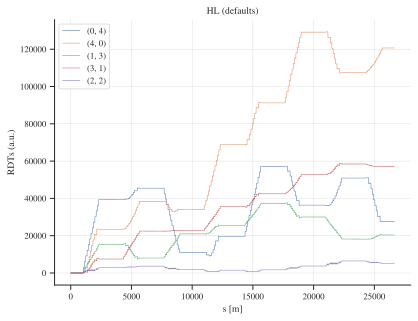

In [17]:
# Load paths
path_optics= "modules/hllhc16/strengths/ramp/opt_ramp_6000.madx"
path_hl = "modules/hllhc16/hllhc_sequence.madx"
path_rematch = "modules/hllhc16/toolkit/rematch_hllhc.madx"

# Plot RDTs with and without phase knob
mad = load_optics(path_optics, path_hl = path_hl, path_settings = None)
#mad.input('set, format="22.14e";')
#mad.input("save, sequence=lhcb1, file=before_rematch.madx;")
mad = rematch_optics(mad, path_rematch)

# mad.input('set, format="22.14e";')
# mad.input("save, sequence=lhcb1,file=after_rematch.madx;")
# mad = rematch_optics(mad, path_rematch)
# mad.input('set, format="22.14e";')
# mad.input("save, sequence=lhcb1,file=second_rematch.madx;")

mad.input("""
!Cycling w.r.t. to IP3 (mandatory to find closed orbit in collision in the presence of errors)
seqedit, sequence=lhcb1; flatten; cycle, start=IP1; flatten; endedit;
seqedit, sequence=lhcb2; flatten; cycle, start=IP1; flatten; endedit;
""")
        
mad, tb1, tb2 = check_and_load_twiss(mad)
s, dic_RDTs = get_all_RDTs(tb1)
plot_RDT(s, dic_RDTs, title = 'HL (defaults)', title_save = "HL_RDT.pdf")

In [18]:
mad.twiss()


enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

length orbit5 alfa gammatr 
26658.8831999989 -0 0.000347253163258773 53.6632405426041 

q1 dq1 betxmax dxmax 
62.309999999957 2.00000000000419 605.004339109644 2.74247720213548 

dxrms xcomax xcorms q2 
1.4893041491916 0 0 60.3200000000093 

dq2 betymax dymax dyrms 
2.00000000001618 684.569053163382 -0 0 

ycomax ycorms deltap synch_1 
0 0 0 0 

synch_2 synch_3 synch_4 synch_5 
0 0 0 0 

synch_6 synch_8 nflips dqmin 
0 0 0 0 

dqmin_phase 
0 


<Table 'twiss': {name, keyword, s, betx, alfx, mux, bety, alfy, muy, x, px, y, py, t, pt, dx, dpx, dy, dpy, wx, phix, dmux, wy, phiy, dmuy, ddx, ddpx, ddy, ddpy, r11, r12, r21, r22, energy, l, angle, k0l, k0sl, k1l, k1sl, k2l, k2sl, k3l, k3sl, k4l, k4sl, k5l, k5sl, k6l, k6sl, k7l, k7sl, k8l, k8sl, k9l, k9sl, k10l, k10sl, k11l, k11sl, k12l, k12sl, k13l, k13sl, k14l, k14sl, k15l, k15sl, k16l, k16sl, k17l, k17sl, k18l, k18sl, k19l, k19sl, k20l, k20sl, ksi, hkick, vkick, tilt, e1, e2, h1, h2, hgap, fint, fintx, volt, lag, freq, harmon, slot_id, assembly_id, mech_sep, v_pos, bbcharge, xma, yma, sigx, sigy, lrad, parent, comments, re11, re12, re13, re14, re15, re16, re21, re22, re23, re24, re25, re26, re31, re32, re33, re34, re35, re36, re41, re42, re43, re44, re45, re46, re51, re52, re53, re54, re55, re56, re61, re62, re63, re64, re65, re66, kmax, kmin, calib, polarity, alfa, beta11, beta12, beta13, beta21, beta22, beta23, beta31, beta32, beta33, alfa11, alfa12, alfa13, alfa21, alfa22, alfa

In [19]:
tb1.muy

array([ 0.        ,  0.07379181,  0.20148807, ..., 60.32      ,
       60.32      , 60.32      ])

In [20]:
# # Save optics
# mad.input("""
# exec,save_optics_hllhc(opt_inj_6000.madx);
# """)

In [21]:
for x in tb1.name:
    print(x)

ip1
mbas2.1r1
drift_0
taxs.1r1
drift_1
bpmqstza.1r1.b1
drift_2
mqxfa.a1r1
drift_3
mqxfa.b1r1
drift_4
bpmqstzb.a2r1.b1
drift_5
mcbxfbh.a2r1
mcbxfbv.a2r1
drift_6
mqxfb.a2r1
drift_7
bpmqstzb.b2r1.b1
drift_8
mqxfb.b2r1
drift_9
mcbxfbh.b2r1
mcbxfbv.b2r1
drift_10
bpmqstzb.a3r1.b1
drift_11
mqxfa.a3r1
drift_12
mqxfa.b3r1
drift_13
bpmqstzb.b3r1.b1
drift_14
mcbxfah.3r1
mcbxfav.3r1
drift_15
mqsxf.3r1
drift_16
mctxf.3r1
drift_17
mctsxf.3r1
drift_18
mcdxf.3r1
drift_19
mcdsxf.3r1
drift_20
mcoxf.3r1
drift_21
mcosxf.3r1
drift_22
mcsxf.3r1
drift_23
mcssxf.3r1
drift_24
bpmqstzb.4r1.b1
drift_25
mbxf.4r1
drift_26
vmbxf.4r1
drift_27
vmbxfa.4r1
drift_28
vmbxfb.4r1
drift_29
dfxj.4r1
drift_30
vtaxna.4r1.b1
drift_31
taxn.4r1
vtaxnb.4r1.b1
drift_32
vtctpxv.4r1.a.b1
drift_33
vtctpxv.4r1.b.b1
drift_34
vtctpxh.4r1.a.b1
drift_35
vtctpxh.4r1.b.b1
drift_36
tclpx.4r1.b1
drift_37
mbrd.4r1.b1
drift_38
mcbrdv.4r1.b1
drift_39
mcbrdh.4r1.b1
drift_40
bpmqbczb.4r1.b1
drift_41
vacfca.4ar1.b1
drift_42
vacfca.4br1.b1
drift_43
a

In [22]:
tb1.mux

array([ 0.        ,  0.07379181,  0.20148807, ..., 62.31      ,
       62.31      , 62.31      ])

In [23]:
# Get the phasing in the arcs and straight sections
ll_mu_b1_HL = return_mu_values(tb1)
ll_mu_b2_HL = return_mu_values(tb2)

# Rotate the two lists to have the same order
#ll_mu_b1_HL = np.roll(ll_mu_b1_HL, 2)


#muxIP1
# mux12b1 

print(ll_mu_b1_HL[0])
print(ll_mu_b1_HL[1])



['s.ds.l1.b1' 'e.ds.r1.b1' 's.ds.l2.b1' 'e.ds.r2.b1' 's.ds.l3.b1'
 'e.ds.r3.b1' 's.ds.l4.b1' 'e.ds.r4.b1' 's.ds.l5.b1' 'e.ds.r5.b1'
 's.ds.l6.b1' 'e.ds.r6.b1' 's.ds.l7.b1' 'e.ds.r7.b1' 's.ds.l8.b1'
 'e.ds.r8.b1' 's.ds.l1.b1']
['s.ds.l1.b2' 'e.ds.r1.b2' 's.ds.l2.b2' 'e.ds.r2.b2' 's.ds.l3.b2'
 'e.ds.r3.b2' 's.ds.l4.b2' 'e.ds.r4.b2' 's.ds.l5.b2' 'e.ds.r5.b2'
 's.ds.l6.b2' 'e.ds.r6.b2' 's.ds.l7.b2' 'e.ds.r7.b2' 's.ds.l8.b2'
 'e.ds.r8.b2' 's.ds.l1.b2']
[2.6427 2.95   2.255  2.16   2.6427 2.13   2.455  3.02  ]
[5.24416475 5.25700659 5.26873907 5.21789275 5.24416475 5.2806135
 5.32412584 5.21789275]


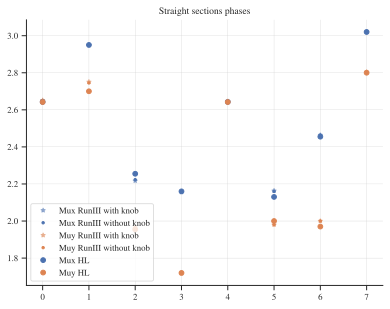

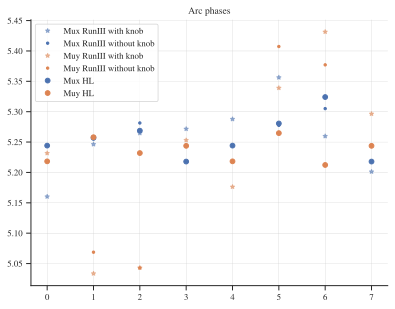

In [24]:
# See how phase compare between HL and RunIII
plt.plot(ll_mu_b1_runIII_with_knob[0], label = 'Mux RunIII with knob', color = 'C0', marker = '*', linewidth = 0, alpha = 0.5)
plt.plot(ll_mu_b1_runIII_without_knob[0], label = 'Mux RunIII without knob', color = 'C0', marker = '.', linewidth = 0)
plt.plot(ll_mu_b1_runIII_with_knob[2], label = 'Muy RunIII with knob', color = 'C1',  marker = '*', linewidth = 0, alpha = 0.5)
plt.plot(ll_mu_b1_runIII_without_knob[2], label = 'Muy RunIII without knob', color = 'C1', marker = '.', linewidth = 0)
plt.plot(ll_mu_b1_HL[0], label = 'Mux HL', color = 'C0', marker = 'o', linewidth = 0)
plt.plot(ll_mu_b1_HL[2], label = 'Muy HL', color = 'C1', marker = 'o', linewidth = 0)
plt.legend()
plt.grid()
plt.title('Straight sections phases')
plt.show()



plt.plot(ll_mu_b1_runIII_with_knob[1], label = 'Mux RunIII with knob', color = 'C0', marker = '*', linewidth = 0, alpha = 0.5)
plt.plot(ll_mu_b1_runIII_without_knob[1], label = 'Mux RunIII without knob', color = 'C0', marker = '.', linewidth = 0)
plt.plot(ll_mu_b1_runIII_with_knob[3], label = 'Muy RunIII with knob', color = 'C1', marker = '*', linewidth = 0, alpha = 0.5)
plt.plot(ll_mu_b1_runIII_without_knob[3], label = 'Muy RunIII without knob', color = 'C1', marker = '.', linewidth = 0)
plt.plot(ll_mu_b1_HL[1], label = 'Mux HL', color = 'C0', marker = 'o', linewidth = 0)
plt.plot(ll_mu_b1_HL[3], label = 'Muy HL', color = 'C1', marker = 'o', linewidth = 0)
plt.legend()
plt.grid()
plt.title('Arc phases')
plt.show()

In [25]:
# Impose run III with knob phases to HL
l_mux_ss_b1, l_mux_arc_b1, l_muy_ss_b1, l_muy_arc_b1 = ll_mu_b1_runIII_with_knob
l_mux_ss_b2, l_mux_arc_b2, l_muy_ss_b2, l_muy_arc_b2 = ll_mu_b2_runIII_with_knob

for ip, (mux_ss_b1, muy_ss_b1, mux_ss_b2, muy_ss_b2) in enumerate(zip(l_mux_ss_b1, l_muy_ss_b1, l_mux_ss_b2, l_muy_ss_b2)):
    mad.input(f"""
    muxIP{ip+1}b1={mux_ss_b1};
    muyIP{ip+1}b1={muy_ss_b1};
    muxIP{ip+1}b2={mux_ss_b2};
    muyIP{ip+1}b2={muy_ss_b2};
    """)
    
for ip, (mux_arc_b1, muy_arc_b1, mux_arc_b2, muy_arc_b2) in enumerate(zip(l_mux_arc_b1, l_muy_arc_b1, l_mux_arc_b2, l_muy_arc_b2)):
    mad.input(f"""
    mux{ip+1}{(ip+2)%8}b1={mux_arc_b1};
    muy{ip+1}{(ip+2)%8}b1={muy_arc_b1};
    mux{ip+1}{(ip+2)%8}b2={mux_arc_b2};
    muy{ip+1}{(ip+2)%8}b2={muy_arc_b2};
    """)
    
# ! What to do with e.g. muxIP1b1_L or muxIP1b1_R ?


GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large bl

Max number of match macros reached. Augmenting.
number of variables:    2
user given constraints: 0
total constraints:      4

START JACOBIAN:

 JACOBIAN Strategy =           3
Initial Penalty Function =   0.1997781886875135E-01


 Solve system with            4 con,           2 var
 Rank             2   Condition number    1.4305876369794155     
 Step length    4.3241282685037834E-003
call:     2 Dx =   0.43241283E-02  Penalty function =  0.1626728215015153E-01
 Solve system with            4 con,           2 var
 Rank             2   Condition number    1.4364700533233101     
 Step length    6.2382071939818636E-006
call:     3 Dx =   0.62382072E-05  Penalty function =  0.1626727537097102E-01
 ++++++++++ JACOBIAN ended: call limit
 Final difference norm:   7.2858158111662507E-003

MATCH SUMMARY

--------------------------------------------------------------------
macro: phasearc(1,2,12,b1) 
  constraint: mux12b1=refmux12b1                      
  values:     +5.23189e+00=+5.16024e+0

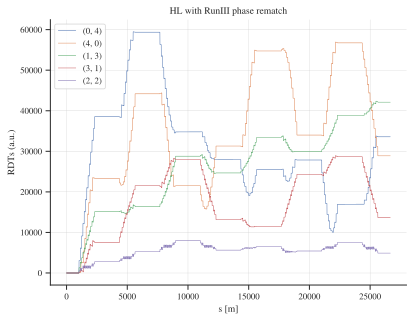

In [26]:
mad = rematch_optics(mad, path_rematch)
mad, tb1, tb2 = check_and_load_twiss(mad)
s, dic_RDTs = get_all_RDTs(tb1)
plot_RDT(s, dic_RDTs, title = 'HL with RunIII phase rematch', title_save = "HL_rematched_RDT.pdf")